In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.datasets import fashion_mnist 

In [2]:
fashion_mnist = keras.datasets.fashion_mnist 
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
trn_images,valid_images,trn_labels,valid_labels = train_test_split(train_images,train_labels,random_state=42)

In [3]:
trn_images=trn_images / 255.0
test_images=test_images /255.0
valid_images=valid_images / 255.0

In [4]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[28,28]))
model1.add(keras.layers.Dense(300,activation='relu'))
model1.add(keras.layers.Dense(10,activation='softmax'))

In [5]:
model2= keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28,28]))
model2.add(keras.layers.Dense(300,activation='relu'))
model2.add(keras.layers.Dense(10,activation='softmax'))

In [6]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [7]:
model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [8]:
history=model1.fit(trn_images,trn_labels,epochs=50,validation_data=(valid_images,valid_labels))

Epoch 1/50
1407/1407 [==============================] - 5s 4ms/step - loss: 0.5055 - accuracy: 0.8192 - val_loss: 0.4278 - val_accuracy: 0.8465
Epoch 2/50
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3762 - accuracy: 0.8639 - val_loss: 0.3914 - val_accuracy: 0.8605
Epoch 3/50
1407/1407 [==============================] - 6s 5ms/step - loss: 0.3358 - accuracy: 0.8751 - val_loss: 0.3563 - val_accuracy: 0.8730
Epoch 4/50
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3108 - accuracy: 0.8840 - val_loss: 0.3386 - val_accuracy: 0.8790
Epoch 5/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2908 - accuracy: 0.8909 - val_loss: 0.3564 - val_accuracy: 0.8689
Epoch 6/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2779 - accuracy: 0.8960 - val_loss: 0.3424 - val_accuracy: 0.8751
Epoch 7/50
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2622 - accuracy: 0.9021 - val_loss: 0.3055 - val_accuracy:

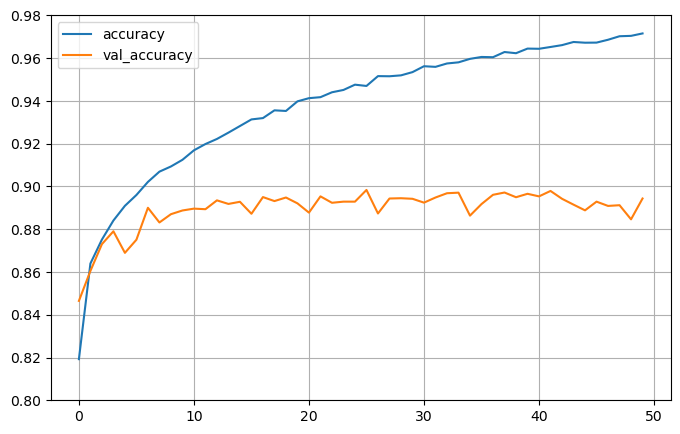

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
df = pd.DataFrame(history.history)
ind=[1,3]
df.iloc[:,ind].plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.8,0.98) #set the vertical range to [0.5-1]
plt.show()

In [10]:
model1.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 930us/step - loss: 0.5668 - accuracy: 0.8894


[0.5667552947998047, 0.8894000053405762]

In [11]:
callback=tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)

In [12]:
history1=model2.fit(trn_images,trn_labels,epochs=50,validation_data=(valid_images,valid_labels),callbacks=[callback])

Epoch 1/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5109 - accuracy: 0.8205 - val_loss: 0.3903 - val_accuracy: 0.8603
Epoch 2/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3830 - accuracy: 0.8608 - val_loss: 0.3738 - val_accuracy: 0.8649
Epoch 3/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3379 - accuracy: 0.8765 - val_loss: 0.3625 - val_accuracy: 0.8679
Epoch 4/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3119 - accuracy: 0.8840 - val_loss: 0.3371 - val_accuracy: 0.8792
Epoch 5/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2919 - accuracy: 0.8934 - val_loss: 0.3496 - val_accuracy: 0.8749
Epoch 6/50
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2757 - accuracy: 0.8983 - val_loss: 0.3239 - val_accuracy: 0.8846
Epoch 7/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2634 - accuracy: 0.9014 - val_loss: 0.3164 - val_accuracy:

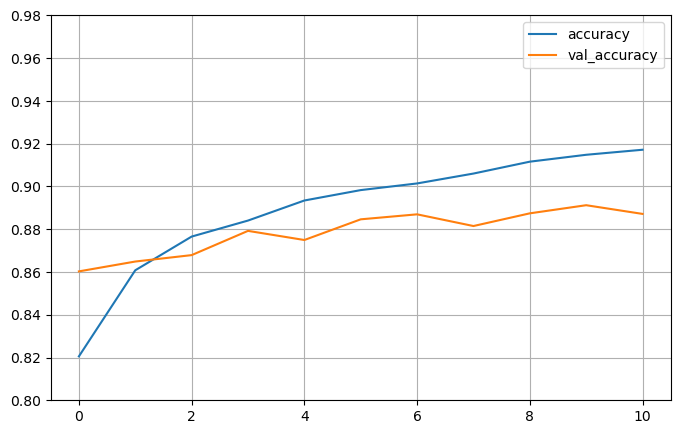

In [15]:
import pandas as pd 
import matplotlib.pyplot as plt 
df = pd.DataFrame(history1.history)
ind=[1,3]
df.iloc[:,ind].plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.8,0.98) #set the vertical range to [0.5-1]
plt.show()

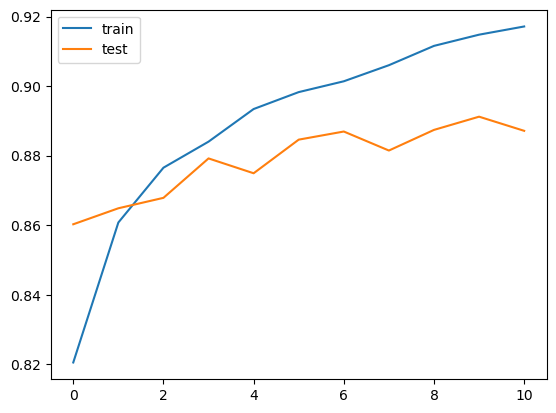

In [18]:
from matplotlib import pyplot
pyplot.plot(history1.history['accuracy'],label='train')
pyplot.plot(history1.history['val_accuracy'],label='test')
pyplot.legend()

In [19]:
model2.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3393 - accuracy: 0.8790


[0.3393002450466156, 0.8790000081062317]